# Telco Customer Churn - Exploratory Data Analysis & Relationship Testing

This notebook performs:
1. **Loading** the cleaned Telco Customer Churn dataset
2. **EDA** — checking for missing values, outliers, and suggesting treatments
3. **Relationship Testing** — Chi-Square (categorical vs Churn) and ANOVA (continuous vs Churn)
4. **Summary** of which variables have a statistically significant relationship with Churn

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Load the Dataset

In [2]:
df = pd.read_csv('Telco_Customer_Churn_CLEANED.csv')
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
df.head()

Dataset shape: (7043, 28)
Number of rows: 7043
Number of columns: 28


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnFlag,SeniorCitizenLabel,TenureGroup,MonthlyChargeCategory,RevenueLost,HasInternetService,HasPhoneService
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-Month,Yes,Electronic Check,29.85,29.85,No,0,No,0-1 Year,Low (< $30),0.00,Yes,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One Year,No,Mailed Check,56.95,1889.50,No,0,No,2-3 Years,Medium ($30-$70),0.00,Yes,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-Month,Yes,Mailed Check,53.85,108.15,Yes,1,No,0-1 Year,Medium ($30-$70),108.15,Yes,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One Year,No,Bank Transfer (Automatic),42.30,1840.75,No,0,No,3-4 Years,Medium ($30-$70),0.00,Yes,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber Optic,No,No,No,No,No,No,Month-to-Month,Yes,Electronic Check,70.70,151.65,Yes,1,No,0-1 Year,High (> $70),151.65,Yes,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   SeniorCitizen          7043 non-null   int64  
 3   Partner                7043 non-null   object 
 4   Dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   PhoneService           7043 non-null   object 
 7   MultipleLines          7043 non-null   object 
 8   InternetService        7043 non-null   object 
 9   OnlineSecurity         7043 non-null   object 
 10  OnlineBackup           7043 non-null   object 
 11  DeviceProtection       7043 non-null   object 
 12  TechSupport            7043 non-null   object 
 13  StreamingTV            7043 non-null   object 
 14  StreamingMovies        7043 non-null   object 
 15  Cont

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChurnFlag,RevenueLost
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,406.492532
std,0.368612,24.559481,30.090047,2266.794470,0.441561,1185.695121
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,44.400000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,8684.800000


In [5]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizenLabel,TenureGroup,MonthlyChargeCategory,HasInternetService,HasPhoneService
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4,2,2,6,3,2,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber Optic,No,No,No,No,No,No,Month-to-Month,Yes,Electronic Check,No,No,0-1 Year,High (> $70),Yes,Yes
freq,1,3555,3641,4933,6361,4072,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365,5174,5901,2186,3591,5517,6361


## 3. Identify Variable Types

We separate the variables into **categorical** and **continuous** for appropriate testing.

In [6]:
# Exclude customerID and the target variable Churn from features
exclude_cols = ['customerID', 'Churn']

# Identify continuous (numerical) columns
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
continuous_cols = [c for c in continuous_cols if c not in exclude_cols]

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [c for c in categorical_cols if c not in exclude_cols]

# SeniorCitizen and ChurnFlag are encoded as int but are actually categorical
binary_as_int = ['SeniorCitizen', 'ChurnFlag']
for col in binary_as_int:
    if col in continuous_cols:
        continuous_cols.remove(col)
        if col not in exclude_cols and col != 'Churn':
            categorical_cols.append(col)

# ChurnFlag is essentially the same as Churn (just numeric encoded), so exclude it
if 'ChurnFlag' in categorical_cols:
    categorical_cols.remove('ChurnFlag')

print(f"Continuous variables ({len(continuous_cols)}):")
print(continuous_cols)
print(f"\nCategorical variables ({len(categorical_cols)}):")
print(categorical_cols)

Continuous variables (4):
['tenure', 'MonthlyCharges', 'TotalCharges', 'RevenueLost']

Categorical variables (21):
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizenLabel', 'TenureGroup', 'MonthlyChargeCategory', 'HasInternetService', 'HasPhoneService', 'SeniorCitizen']


---
## 4. EDA — Missing Values

In [7]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)

if missing_df.empty:
    print("✅ No missing values found in the dataset.")
else:
    print("⚠️ Missing values detected:")
    print(missing_df)
    print("\nSuggested treatments:")
    for col in missing_df.index:
        pct = missing_df.loc[col, 'Missing %']
        if pct > 40:
            print(f"  - {col} ({pct:.1f}% missing): Consider dropping this column")
        elif col in continuous_cols:
            print(f"  - {col} ({pct:.1f}% missing): Impute with median (robust to outliers)")
        else:
            print(f"  - {col} ({pct:.1f}% missing): Impute with mode (most frequent value)")

✅ No missing values found in the dataset.


---
## 5. EDA — Outlier Detection

Using the **IQR (Interquartile Range)** method for continuous variables.

In [8]:
# Outlier detection using IQR
outlier_summary = []

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Variable': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count,
        'Outlier %': round(outlier_pct, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
print("Outlier Summary (IQR Method):")
outlier_df

Outlier Summary (IQR Method):


,Variable,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count,Outlier %
0,tenure,9.00,55.00,46.00,-60.000,124.000,0,0.00
1,MonthlyCharges,35.50,89.85,54.35,-46.025,171.375,0,0.00
2,TotalCharges,398.55,3786.60,3388.05,-4683.525,8868.675,0,0.00
3,RevenueLost,0.00,44.40,44.40,-66.600,111.000,1424,20.22


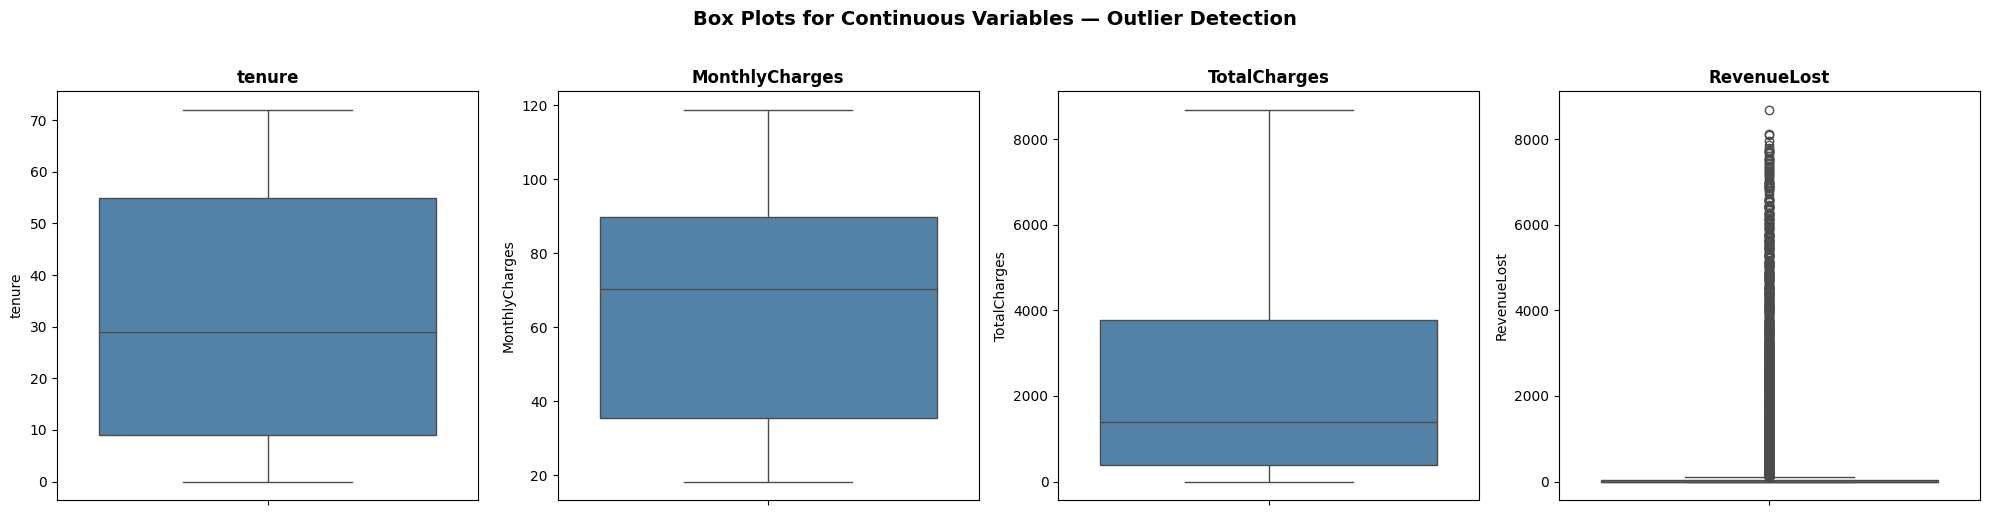

In [9]:
# Visualize outliers with box plots
fig, axes = plt.subplots(1, len(continuous_cols), figsize=(5 * len(continuous_cols), 5))
if len(continuous_cols) == 1:
    axes = [axes]

for i, col in enumerate(continuous_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='steelblue')
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(col)

plt.suptitle('Box Plots for Continuous Variables — Outlier Detection', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [10]:
# Suggest outlier treatments
print("Suggested Outlier Treatments:")
print("=" * 60)
for _, row in outlier_df.iterrows():
    col = row['Variable']
    count = int(row['Outlier Count'])
    pct = row['Outlier %']
    if count == 0:
        print(f"\n✅ {col}: No outliers detected.")
    elif pct < 1:
        print(f"\n⚠️ {col}: {count} outliers ({pct}%)")
        print(f"   → Few outliers. Could be removed or capped/winsorized.")
    elif pct < 5:
        print(f"\n⚠️ {col}: {count} outliers ({pct}%)")
        print(f"   → Moderate outliers. Consider capping at the IQR bounds (winsorizing).")
    else:
        print(f"\n⚠️ {col}: {count} outliers ({pct}%)")
        print(f"   → Many outliers. This may be a naturally skewed distribution.")
        print(f"   → Consider log transformation or robust scaling instead of removal.")

Suggested Outlier Treatments:

✅ tenure: No outliers detected.

✅ MonthlyCharges: No outliers detected.

✅ TotalCharges: No outliers detected.

⚠️ RevenueLost: 1424 outliers (20.22%)
   → Many outliers. This may be a naturally skewed distribution.
   → Consider log transformation or robust scaling instead of removal.


---
## 6. Churn Distribution

Churn distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn rate: 26.54%


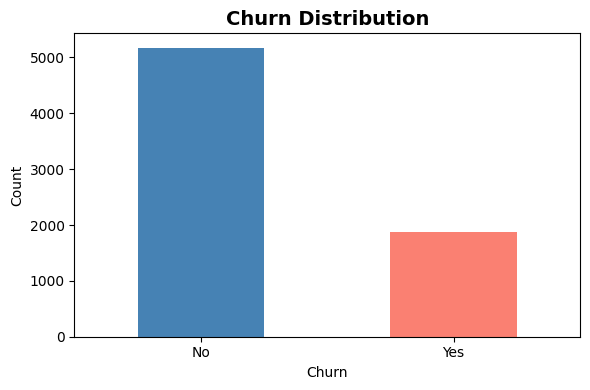

In [11]:
print("Churn distribution:")
print(df['Churn'].value_counts())
print(f"\nChurn rate: {df['Churn'].value_counts(normalize=True)['Yes']*100:.2f}%")

fig, ax = plt.subplots(figsize=(6, 4))
df['Churn'].value_counts().plot(kind='bar', color=['steelblue', 'salmon'], ax=ax)
ax.set_title('Churn Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_xticklabels(['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

---
## 7. Relationship Testing

We test the relationship between each feature and the **Churn** variable:

| Feature Type | Target Type | Test Used |
|---|---|---|
| Categorical | Categorical (Churn) | **Chi-Square Test** |
| Continuous | Categorical (Churn) | **One-Way ANOVA** |

**Significance level: α = 0.05**

### 7.1 Chi-Square Test — Categorical Variables vs Churn

In [12]:
alpha = 0.05
chi2_results = []

for col in categorical_cols:
    # Create contingency table
    contingency = pd.crosstab(df[col], df['Churn'])
    
    # Perform Chi-Square test
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    
    # Determine significance
    significant = 'Yes' if p_value < alpha else 'No'
    
    chi2_results.append({
        'Variable': col,
        'Test': 'Chi-Square',
        'Chi2 Statistic': round(chi2, 4),
        'p-value': round(p_value, 6),
        'DoF': dof,
        'Significant (p < 0.05)': significant
    })

chi2_df = pd.DataFrame(chi2_results)
print("Chi-Square Test Results (Categorical vs Churn):")
print("=" * 80)
chi2_df

Chi-Square Test Results (Categorical vs Churn):


,Variable,Test,Chi2 Statistic,p-value,DoF,Significant (p < 0.05)
0,gender,Chi-Square,0.4841,0.486579,1,No
1,Partner,Chi-Square,158.7334,0.000000,1,Yes
2,Dependents,Chi-Square,189.1292,0.000000,1,Yes
3,PhoneService,Chi-Square,0.9150,0.338783,1,No
4,MultipleLines,Chi-Square,11.1433,0.000843,1,Yes
5,InternetService,Chi-Square,732.3096,0.000000,2,Yes
6,OnlineSecurity,Chi-Square,205.6331,0.000000,1,Yes
7,OnlineBackup,Chi-Square,47.2609,0.000000,1,Yes
8,DeviceProtection,Chi-Square,30.5134,0.000000,1,Yes
9,TechSupport,Chi-Square,190.1668,0.000000,1,Yes


### 7.2 One-Way ANOVA — Continuous Variables vs Churn

In [13]:
anova_results = []

for col in continuous_cols:
    # Split into groups based on Churn
    group_yes = df[df['Churn'] == 'Yes'][col].dropna()
    group_no = df[df['Churn'] == 'No'][col].dropna()
    
    # Perform One-Way ANOVA
    f_stat, p_value = f_oneway(group_yes, group_no)
    
    # Determine significance
    significant = 'Yes' if p_value < alpha else 'No'
    
    anova_results.append({
        'Variable': col,
        'Test': 'ANOVA',
        'F-Statistic': round(f_stat, 4),
        'p-value': round(p_value, 6),
        'Mean (Churn=Yes)': round(group_yes.mean(), 2),
        'Mean (Churn=No)': round(group_no.mean(), 2),
        'Significant (p < 0.05)': significant
    })

anova_df = pd.DataFrame(anova_results)
print("ANOVA Test Results (Continuous vs Churn):")
print("=" * 80)
anova_df

ANOVA Test Results (Continuous vs Churn):


,Variable,Test,F-Statistic,p-value,Mean (Churn=Yes),Mean (Churn=No),Significant (p < 0.05)
0,tenure,ANOVA,997.2680,0.0,17.98,37.57,Yes
1,MonthlyCharges,ANOVA,273.4637,0.0,74.44,61.27,Yes
2,TotalCharges,ANOVA,288.2790,0.0,1531.80,2549.91,Yes
3,RevenueLost,ANOVA,3396.5317,0.0,1531.80,0.00,Yes


---
## 8. Summary of Relationship Test Results

In [14]:
# Combine all results
all_results = []

for _, row in chi2_df.iterrows():
    all_results.append({
        'Variable': row['Variable'],
        'Variable Type': 'Categorical',
        'Test Used': 'Chi-Square',
        'p-value': row['p-value'],
        'Significant (p < 0.05)': row['Significant (p < 0.05)'],
        'Relationship with Churn': '✅ Yes' if row['Significant (p < 0.05)'] == 'Yes' else '❌ No'
    })

for _, row in anova_df.iterrows():
    all_results.append({
        'Variable': row['Variable'],
        'Variable Type': 'Continuous',
        'Test Used': 'ANOVA',
        'p-value': row['p-value'],
        'Significant (p < 0.05)': row['Significant (p < 0.05)'],
        'Relationship with Churn': '✅ Yes' if row['Significant (p < 0.05)'] == 'Yes' else '❌ No'
    })

summary_df = pd.DataFrame(all_results)
print("Complete Summary — Relationship between each variable and Churn:")
print("=" * 90)
summary_df

Complete Summary — Relationship between each variable and Churn:


,Variable,Variable Type,Test Used,p-value,Significant (p < 0.05),Relationship with Churn
0,gender,Categorical,Chi-Square,0.486579,No,❌ No
1,Partner,Categorical,Chi-Square,0.000000,Yes,✅ Yes
2,Dependents,Categorical,Chi-Square,0.000000,Yes,✅ Yes
3,PhoneService,Categorical,Chi-Square,0.338783,No,❌ No
4,MultipleLines,Categorical,Chi-Square,0.000843,Yes,✅ Yes
5,InternetService,Categorical,Chi-Square,0.000000,Yes,✅ Yes
6,OnlineSecurity,Categorical,Chi-Square,0.000000,Yes,✅ Yes
7,OnlineBackup,Categorical,Chi-Square,0.000000,Yes,✅ Yes
8,DeviceProtection,Categorical,Chi-Square,0.000000,Yes,✅ Yes
9,TechSupport,Categorical,Chi-Square,0.000000,Yes,✅ Yes


In [15]:
# Separate significant and non-significant variables
sig_vars = summary_df[summary_df['Significant (p < 0.05)'] == 'Yes']['Variable'].tolist()
not_sig_vars = summary_df[summary_df['Significant (p < 0.05)'] == 'No']['Variable'].tolist()

print(f"\n{'='*60}")
print(f"VARIABLES WITH A SIGNIFICANT RELATIONSHIP TO CHURN ({len(sig_vars)}):")
print(f"{'='*60}")
for v in sig_vars:
    row = summary_df[summary_df['Variable'] == v].iloc[0]
    print(f"  ✅ {v} (p = {row['p-value']}, Test: {row['Test Used']})")

print(f"\n{'='*60}")
print(f"VARIABLES WITHOUT A SIGNIFICANT RELATIONSHIP TO CHURN ({len(not_sig_vars)}):")
print(f"{'='*60}")
for v in not_sig_vars:
    row = summary_df[summary_df['Variable'] == v].iloc[0]
    print(f"  ❌ {v} (p = {row['p-value']}, Test: {row['Test Used']})")


VARIABLES WITH A SIGNIFICANT RELATIONSHIP TO CHURN (22):
  ✅ Partner (p = 0.0, Test: Chi-Square)
  ✅ Dependents (p = 0.0, Test: Chi-Square)
  ✅ MultipleLines (p = 0.000843, Test: Chi-Square)
  ✅ InternetService (p = 0.0, Test: Chi-Square)
  ✅ OnlineSecurity (p = 0.0, Test: Chi-Square)
  ✅ OnlineBackup (p = 0.0, Test: Chi-Square)
  ✅ DeviceProtection (p = 0.0, Test: Chi-Square)
  ✅ TechSupport (p = 0.0, Test: Chi-Square)
  ✅ StreamingTV (p = 0.0, Test: Chi-Square)
  ✅ StreamingMovies (p = 0.0, Test: Chi-Square)
  ✅ Contract (p = 0.0, Test: Chi-Square)
  ✅ PaperlessBilling (p = 0.0, Test: Chi-Square)
  ✅ PaymentMethod (p = 0.0, Test: Chi-Square)
  ✅ SeniorCitizenLabel (p = 0.0, Test: Chi-Square)
  ✅ TenureGroup (p = 0.0, Test: Chi-Square)
  ✅ MonthlyChargeCategory (p = 0.0, Test: Chi-Square)
  ✅ HasInternetService (p = 0.0, Test: Chi-Square)
  ✅ SeniorCitizen (p = 0.0, Test: Chi-Square)
  ✅ tenure (p = 0.0, Test: ANOVA)
  ✅ MonthlyCharges (p = 0.0, Test: ANOVA)
  ✅ TotalCharges (p = 0.0

---
## 9. Conclusion

### Variables with a Significant Relationship to Churn

The tests above reveal which predictor variables have a statistically significant association with **Churn** at the **α = 0.05** significance level.

- **Chi-Square Test** was applied for **categorical** variables (e.g., gender, Partner, InternetService, Contract, etc.) vs. Churn.
- **One-Way ANOVA** was applied for **continuous** variables (e.g., tenure, MonthlyCharges, TotalCharges, RevenueLost) vs. Churn.

Variables found to be **significant** should be prioritized in predictive modeling, while **non-significant** variables may be candidates for removal to simplify the model.